In [1]:
from src.ocsmm.OneClassSMMClassifier import OneClassSMMClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

have a 2d gaussian distribution with 0 mean and I covariance matrix. 
add a 3rd feature whos value is (1,2,3) if normal and (18, 91, 20) if outlier.

In [2]:
np.random.seed(20)

# Parameters
num_groups = 100
num_points_per_group = 30
num_features = 3  # Two Gaussian features + one label
num_normal = 97
num_anomalous = 3

# Generate data
dataset = []
for i in range(num_groups):
    if i < num_normal:
        label = np.random.choice([1, 2, 3])  
    else:
        label = np.random.choice([18, 19, 20]) 
    points = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]], size=num_points_per_group)
    feature_3 = np.full((num_points_per_group, 1), label)  # Feature 3 as a column
    group_data = np.hstack([points, feature_3]) 
    dataset.append(group_data)

# Convert dataset into a 3D NumPy array
final_dataset = np.array(dataset)  

In [3]:
final_dataset

array([[[-9.50443117e-01,  1.50227571e+00,  3.00000000e+00],
        [ 2.12601055e+00,  2.49155430e-01,  3.00000000e+00],
        [-6.20642157e-01, -8.34532935e-01,  3.00000000e+00],
        ...,
        [-2.21909547e+00, -7.49404606e-01,  3.00000000e+00],
        [ 4.86063175e-01, -1.76752659e+00,  3.00000000e+00],
        [ 2.22710846e-01, -7.05439508e-01,  3.00000000e+00]],

       [[-5.48331454e-01,  2.97280923e-01,  3.00000000e+00],
        [-6.00914445e-01,  9.10865062e-01,  3.00000000e+00],
        [ 1.43127170e+00,  2.60349438e-01,  3.00000000e+00],
        ...,
        [ 6.83495390e-01,  9.26002960e-01,  3.00000000e+00],
        [ 2.27227061e-01, -1.96859016e-01,  3.00000000e+00],
        [-6.39854207e-01, -1.33643179e-02,  3.00000000e+00]],

       [[-3.14030161e-01, -9.55774320e-01,  1.00000000e+00],
        [ 4.41255095e-01, -2.07323620e-02,  1.00000000e+00],
        [ 4.15292839e-01, -6.92940082e-02,  1.00000000e+00],
        ...,
        [-8.67849560e-01,  5.16497796e-01,

In [24]:
classifier = OneClassSMMClassifier(nu=0.08)

In [25]:
classifier.fit(final_dataset)

In [26]:
decision, y_pred = classifier.predict(final_dataset)

[2.83187897 2.83187931 2.83187888 2.83187932 2.83058359 2.8318793
 2.83187889 2.79335117 2.83187932 2.80588681 1.89609457 1.8419884
 2.27030455]


In [27]:
count_neg_1 = np.count_nonzero(y_pred == -1)
count_pos_1 = np.count_nonzero(y_pred == 1)

print(f"Count of -1: {count_neg_1}")
print(f"Count of +1: {count_pos_1}")

Count of -1: 3
Count of +1: 97


In [44]:
decision

array([  0.        ,   2.70467308,   6.95644859,   4.61814547,
         5.33580007,   3.14384198,   0.81954642,   3.45761598,
         4.76924325,   2.33252531,   6.07588068,   3.91261142,
         7.03499729,   4.94478048,   3.44777832,   3.35083365,
         2.42328518,   7.45542285,   1.50489305,   2.0398247 ,
         2.27872441,   6.42447873,   6.67768486,   1.47838981,
         1.61517439,   5.4292158 ,   2.3912276 ,   5.29472291,
         7.2306297 ,   1.96422163,   1.59141428,   2.18581455,
         1.53940574,   6.32470566,   4.4738824 ,   9.5988635 ,
         2.90820488,   5.67714864,   3.11376348,   2.54033717,
         4.49414229,   6.44190138,   2.76783082,   3.99487147,
         7.72626828,   4.24168904,   4.64726644,   7.41601091,
         2.47603789,   5.06879624,   7.42969285,   2.78238119,
         5.43125569,   7.05692934,   3.03192387,   3.84568525,
         5.25661157,   5.06427405,   2.09756334,   3.85152464,
         4.82550431,   1.83387167,   3.6447522 ,   4.34

In [45]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

[97, 98, 99]

In [46]:
from src.explanation_algorithms.OCSMMSHAP import OCSMMSHAP
ocsmm_shap = OCSMMSHAP(X=final_dataset, classifier=classifier, decision=decision)
ocsmm_shap.fit_ocsmmshap(X=final_dataset, num_coalitions=2**final_dataset[0].shape[1])

100%|██████████| 7/7 [00:00<00:00, 477.34it/s]


In [47]:
shapley_values = ocsmm_shap.return_deterministic_shapley_values()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


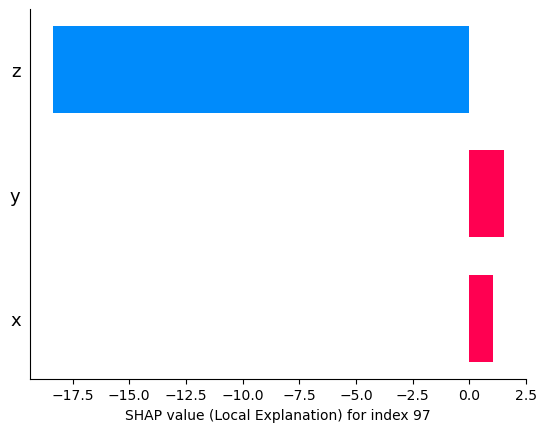

In [49]:
from src.utils.visualisation.deterministic_values import global_bar_plot, local_bar_plot
local_bar_plot(shapley_values, 97, feature_names=['x', 'y', 'z'])

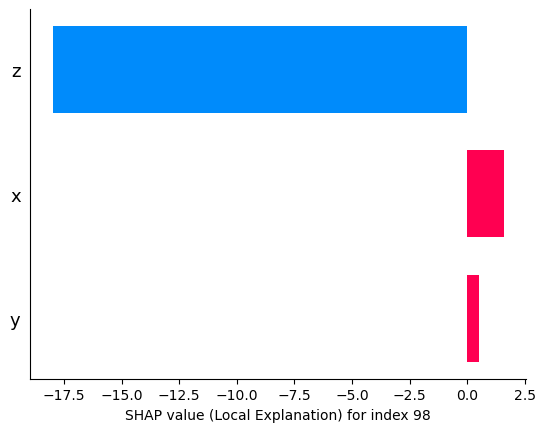

In [50]:
local_bar_plot(shapley_values, 98, feature_names=['x', 'y', 'z'])

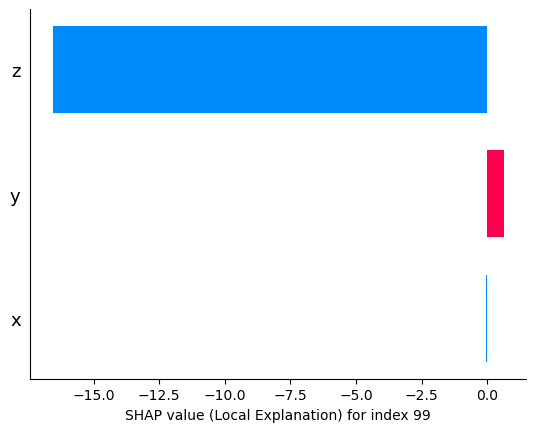

In [51]:
local_bar_plot(shapley_values, 99, feature_names=['x', 'y', 'z'])

Feature z has the highest value in both the outliers which is the expected behaviour

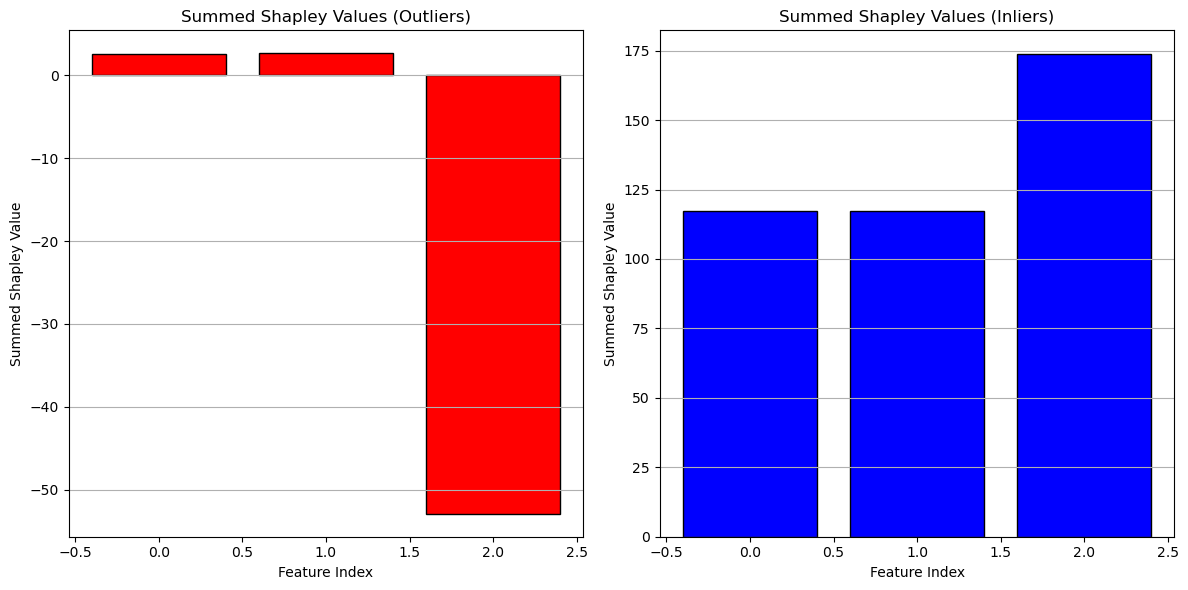

In [52]:
inlier_indices = [i for i in range(shapley_values.shape[1]) if i not in outlier_indices]

summed_outlier_shapley = shapley_values[:, outlier_indices].sum(dim=1).numpy()
summed_inlier_shapley = shapley_values[:, inlier_indices].sum(dim=1).numpy()

# Plot histogram
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Outlier Shapley Values
ax[0].bar(range(len(summed_outlier_shapley)), summed_outlier_shapley, color='red', edgecolor='black')
ax[0].set_title('Summed Shapley Values (Outliers)')
ax[0].set_xlabel('Feature Index')
ax[0].set_ylabel('Summed Shapley Value')
ax[0].grid(True, axis='y')

# Inlier Shapley Values
ax[1].bar(range(len(summed_inlier_shapley)), summed_inlier_shapley, color='blue', edgecolor='black')
ax[1].set_title('Summed Shapley Values (Inliers)')
ax[1].set_xlabel('Feature Index')
ax[1].set_ylabel('Summed Shapley Value')
ax[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

Even in the case of inliers, feature z is telling us the reasons for the prediction

The most influential feature is the feature 3, which is causing the outlier prediction

The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3618.)


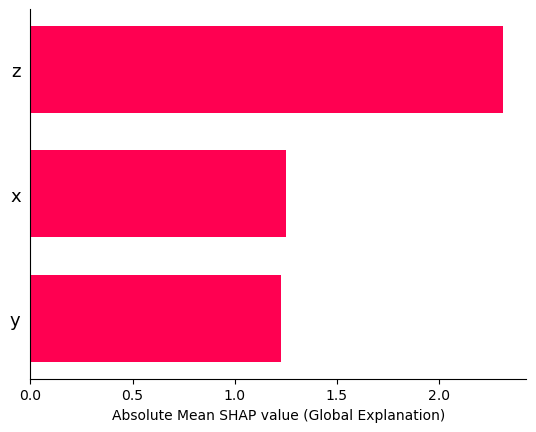

In [53]:
# global importance measure
mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)  

# Call bar_plot for global explanation
global_bar_plot(mean_abs_shap_values, feature_names=['x', 'y', 'z'])

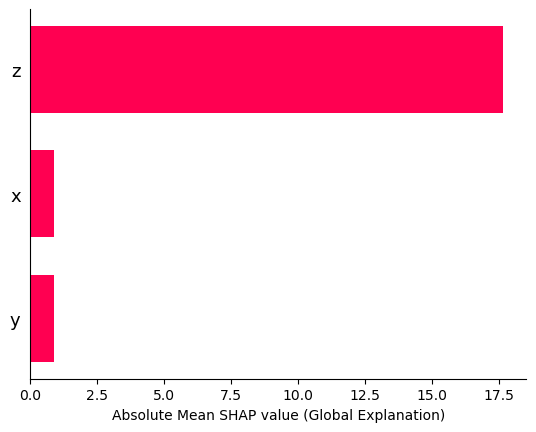

In [54]:
selected_shap_values = shapley_values[:,outlier_indices]
mean_abs_shap_values_outlier = np.abs(selected_shap_values).mean(axis=1) 
global_bar_plot(mean_abs_shap_values_outlier, feature_names=['x', 'y', 'z'])